In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [8]:
# Generate random data
num_obs = 100
x1 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
x2 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
noise = np.random.normal(loc=0.0, scale=1.0, size=num_obs)

# Create a binary target variable
y = (2 * x1 - 3 * x2 + noise > 0).astype(int)

# Reshape x1 and x2 for the logistic regression model
X = np.column_stack((x1, x2))

# Fit the logistic regression model
lr = LogisticRegression().fit(X, y)

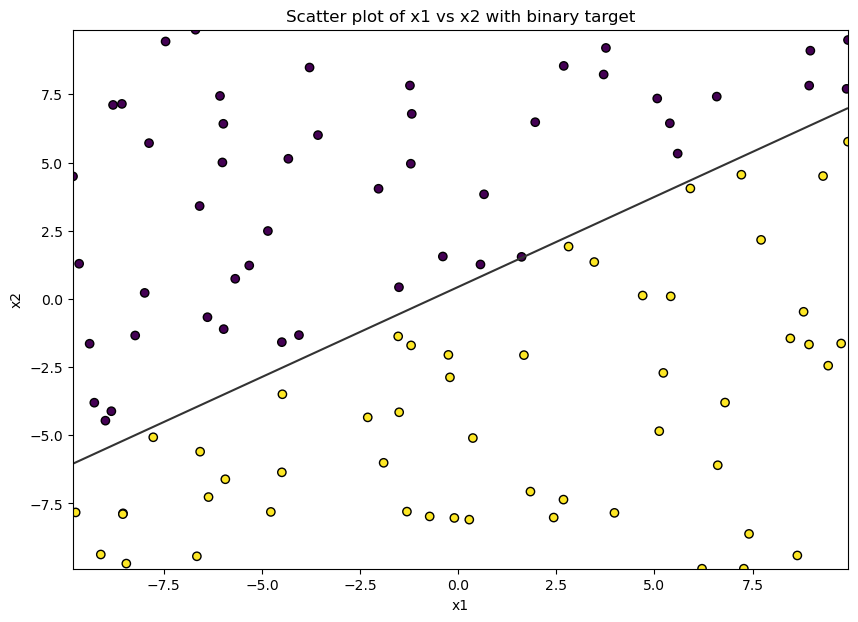

In [9]:
# Plot the original data
plt.figure(figsize=(10, 7))
plt.scatter(x1, x2, c=y, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of x1 vs x2 with binary target')

# Create a grid to plot the decision boundary
x1_grid = np.linspace(x1.min(), x1.max(), 100)
x2_grid = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# Predict probabilities for the grid
probs = lr.predict_proba(grid)[:, 1].reshape(xx1.shape)

# Plot decision boundary
plt.contour(xx1, xx2, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=0.6)

plt.show()

In [10]:
# Predict new values
x_new = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
y_prediction = lr.predict(x_new)
print("Predicted values:", y_prediction)

Predicted values: [1 1 0 0]
